In [1]:
# Import libraries
import pandas as pd
import folium as flm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# Import data
conflicts = pd.read_csv('Brazil Political Violence and Protests Dataset.csv')

# Clean data
conflicts = conflicts.rename(columns={'EVENT_TYPE': 'CONFLICT', 'SUB_EVENT_TYPE': 'SUBCONFLICT'})

# Extract year from event date column for later
conflicts['YEAR'] = pd.to_datetime(conflicts['EVENT_DATE']).dt.year

C:\Users\IdrisRasheed\Downloads\Brazil Conflict Outputs


In [3]:
# Explore data
## Print first few rows and info of the data
print(conflicts.head())
print(conflicts.info())

        EVENT_DATE                    CONFLICT       SUBCONFLICT  \
0  01-January-2018                    Protests  Peaceful protest   
1  01-January-2018                    Protests  Peaceful protest   
2  01-January-2018  Violence against civilians            Attack   
3  01-January-2018  Violence against civilians            Attack   
4  01-January-2018  Violence against civilians            Attack   

                                    ACTOR1              ACTOR2 COUNTRY  \
0                      Protesters (Brazil)                 NaN  Brazil   
1                      Protesters (Brazil)                 NaN  Brazil   
2        Unidentified Armed Group (Brazil)  Civilians (Brazil)  Brazil   
3  Unidentified Gang and/or Police Militia  Civilians (Brazil)  Brazil   
4        Unidentified Armed Group (Brazil)  Civilians (Brazil)  Brazil   

                   LOCATION  LATITUDE  LONGITUDE SOURCE_SCALE  \
0                  Teresina    -5.089    -42.802     National   
1               

In [4]:
# Print unique conflict and subconflict types
conflict_types = conflicts['CONFLICT'].unique()
subconflict_types = conflicts['SUBCONFLICT'].unique()
print(conflict_types)
print(subconflict_types)

['Protests' 'Violence against civilians' 'Battles' 'Riots'
 'Explosions/Remote violence' 'Strategic developments']
['Peaceful protest' 'Attack' 'Armed clash' 'Mob violence'
 'Remote explosive/landmine/IED' 'Violent demonstration'
 'Looting/property destruction' 'Disrupted weapons use'
 'Protest with intervention' 'Arrests' 'Abduction/forced disappearance'
 'Non-violent transfer of territory' 'Sexual violence'
 'Change to group/activity' 'Other' 'Excessive force against protesters'
 'Grenade' 'Chemical weapon' 'Headquarters or base established']


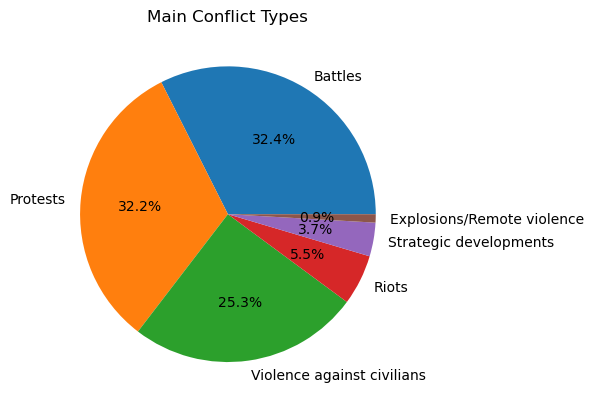

                            COUNT PERCENTAGE
CONFLICT TYPE                               
Battles                     20392     32.44%
Protests                    20210     32.15%
Violence against civilians  15898     25.29%
Riots                        3472      5.52%
Strategic developments       2316      3.68%
Explosions/Remote violence    573      0.91%


In [5]:
# Get value counts of conflict types
conflict_counts = conflicts['CONFLICT'].value_counts()

# Calculate percentage of each conflict type
conflict_p = round(conflict_counts / conflict_counts.sum() * 100,2).astype(str) + '%'

# Combine count and percentage into a dataframe
conflict_pc = pd.DataFrame({'COUNT': conflict_counts, 'PERCENTAGE': conflict_p})

# Rename the index column
conflict_pc = conflict_pc.rename_axis('CONFLICT TYPE')

# Create pie chart
plt.pie(conflict_counts, labels=conflict_counts.index, autopct='%1.1f%%')
plt.title('Main Conflict Types')

# Display the plot
plt.show()

# Display the conflict stats
print(conflict_pc)

In [14]:
# Get value counts of subconflict types
subconflict_counts = conflicts['SUBCONFLICT'].value_counts()

# Calculate percentage of each subconflict type
subconflict_p = round(subconflict_counts / subconflict_counts.sum() * 100,2).astype(str) + '%'

# Combine count and percentage into a dataframe
subconflict_pc = pd.DataFrame({'COUNT': subconflict_counts, 'PERCENTAGE': subconflict_p})

# Rename the index column
subconflict_pc = subconflict_pc.rename_axis('SUBCONFLICT TYPE')

# No pie chart because there are too many categories

# Display the conflict stats
print(subconflict_pc)

                                    COUNT PERCENTAGE
SUBCONFLICT TYPE                                    
Armed clash                         20392     32.44%
Peaceful protest                    19916     31.68%
Attack                              15609     24.83%
Violent demonstration                2112      3.36%
Looting/property destruction         1893      3.01%
Mob violence                         1360      2.16%
Remote explosive/landmine/IED         564       0.9%
Protest with intervention             272      0.43%
Arrests                               251       0.4%
Abduction/forced disappearance        210      0.33%
Disrupted weapons use                  82      0.13%
Sexual violence                        79      0.13%
Change to group/activity               43      0.07%
Other                                  43      0.07%
Excessive force against protesters     22      0.03%
Grenade                                 8      0.01%
Non-violent transfer of territory       3     

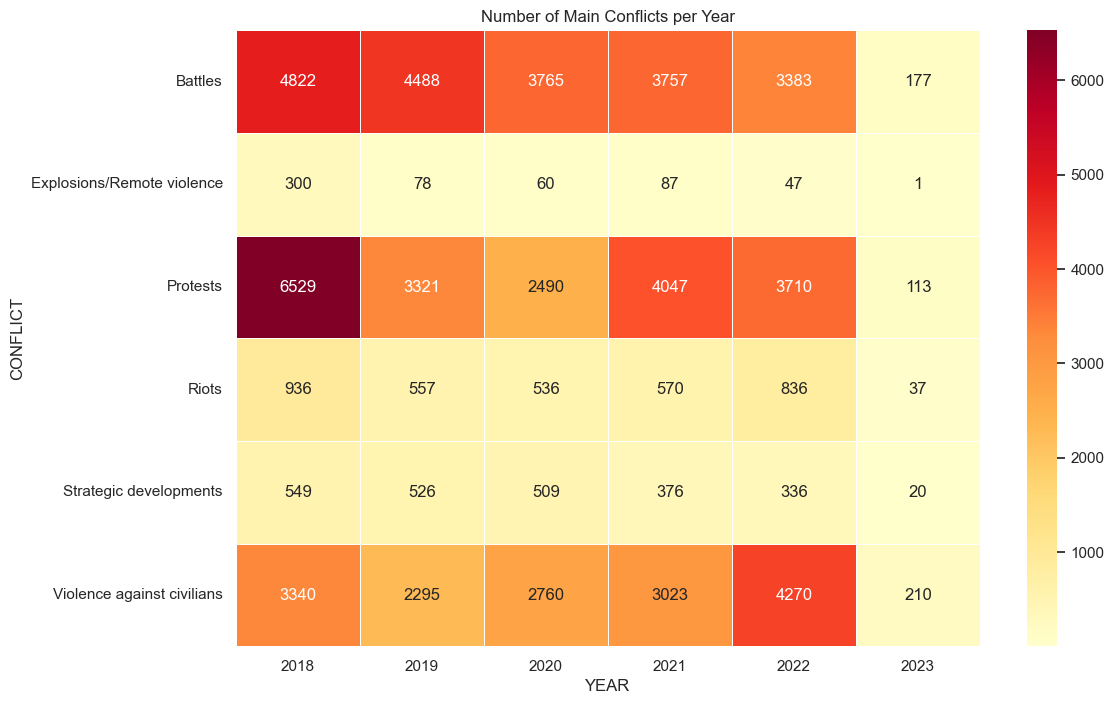

In [15]:
# Group conflicts by year and event type
conflict_counts = conflicts.groupby(['YEAR', 'CONFLICT']).size().reset_index(name='COUNT')

# Create pivot table with year as rows and event types as columns
pivot_table = conflict_counts.pivot_table(index='CONFLICT', columns='YEAR', values='COUNT', aggfunc='sum')

# Create heatmap using seaborn
sns.set(style='white')
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='d', linewidths=.5)
plt.title('Number of Main Conflicts per Year')
plt.show()

In [8]:
# Print total number of fatalities
total_fatalities = conflicts['FATALITIES'].sum()
print(f'Total number of fatalities: {total_fatalities:,}')

Total number of fatalities: 28,736


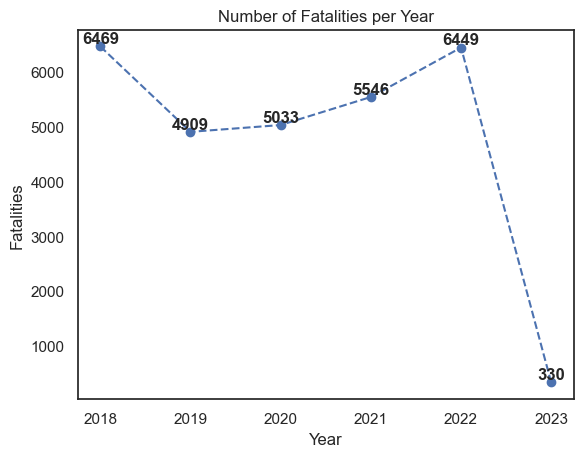

In [9]:
# Group by year and total fatalities
fat_by_year = conflicts.groupby('YEAR')['FATALITIES'].sum()

# Create datetime objects for x-axis
x = [mdates.datetime.datetime(year, 1, 1) for year in fat_by_year.index]

# Plot line chart
fig, ax = plt.subplots()
ax.plot_date(x, fat_by_year.values, linestyle='--')

# Format x-axis as years
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Label axes and title
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.title('Number of Fatalities per Year')

# Add the number of fatalities to each plot point
for i, j in enumerate(fat_by_year.values):
    ax.text(x[i], j, str(j), ha='center', va='bottom', weight='bold')

plt.show()

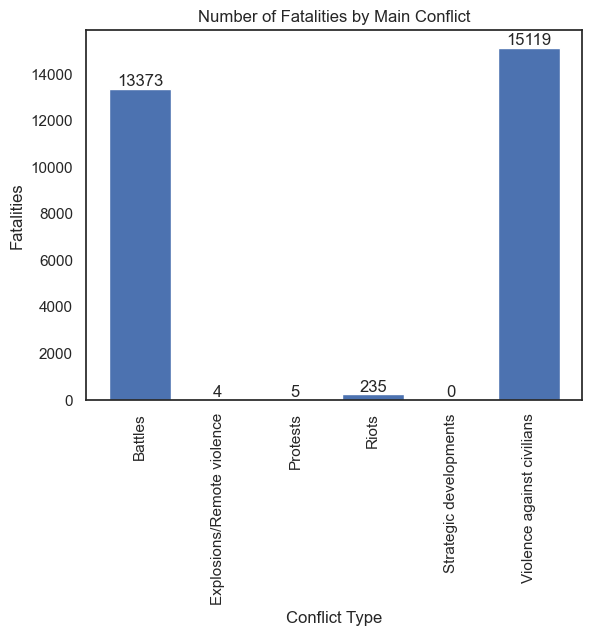

                     CONFLICT  FATALITIES FATALITY_PERCENTAGE
0                     Battles       13373              46.54%
1  Explosions/Remote violence           4               0.01%
2                    Protests           5               0.02%
3                       Riots         235               0.82%
4      Strategic developments           0                0.0%
5  Violence against civilians       15119              52.61%


In [10]:
# Group data fatalities by conflict type
fat_by_conflict_type = conflicts.groupby('CONFLICT')['FATALITIES'].sum().reset_index()
fat_count = fat_by_conflict_type['FATALITIES'].sum()
fat_by_conflict_type['FATALITY_PERCENTAGE'] = round(fat_by_conflict_type['FATALITIES'] / fat_count * 100, 2).astype(str) + '%'

# Plot bar chart of fatalities by conflict type
plt.bar(fat_by_conflict_type['CONFLICT'], fat_by_conflict_type['FATALITIES'])
plt.xticks(rotation=90)
plt.xlabel('Conflict Type')
plt.ylabel('Fatalities')
plt.title('Number of Fatalities by Main Conflict')
for i, j in enumerate(fat_by_conflict_type['FATALITIES']):
    plt.text(i, j, str(j), ha='center', va='bottom')
plt.show()

print(fat_by_conflict_type)

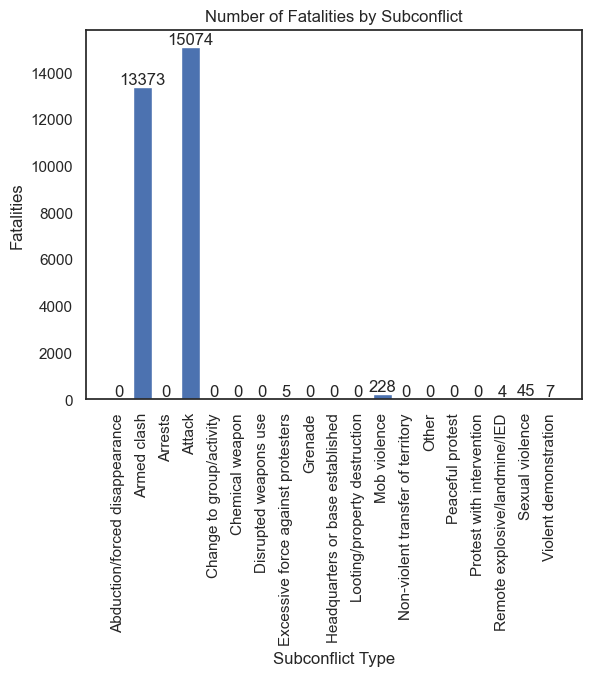

                           SUBCONFLICT  FATALITIES FATALITY_PERCENTAGE
0       Abduction/forced disappearance           0                0.0%
1                          Armed clash       13373              46.54%
2                              Arrests           0                0.0%
3                               Attack       15074              52.46%
4             Change to group/activity           0                0.0%
5                      Chemical weapon           0                0.0%
6                Disrupted weapons use           0                0.0%
7   Excessive force against protesters           5               0.02%
8                              Grenade           0                0.0%
9     Headquarters or base established           0                0.0%
10        Looting/property destruction           0                0.0%
11                        Mob violence         228               0.79%
12   Non-violent transfer of territory           0                0.0%
13    

In [11]:
# Group fatalities by subconflict type
fat_by_subconflict_type = conflicts.groupby('SUBCONFLICT')['FATALITIES'].sum().reset_index()
fat_count_sub = fat_by_subconflict_type['FATALITIES'].sum()
fat_by_subconflict_type['FATALITY_PERCENTAGE'] = round(fat_by_subconflict_type['FATALITIES'] / fat_count_sub * 100, 2).astype(str) + '%'

# Plot bar chart of fatalities by subconflict type
plt.bar(fat_by_subconflict_type['SUBCONFLICT'], fat_by_subconflict_type['FATALITIES'])
plt.xticks(rotation=90)
plt.xlabel('Subconflict Type')
plt.ylabel('Fatalities')
plt.title('Number of Fatalities by Subconflict')
for i, j in enumerate(fat_by_subconflict_type['FATALITIES']):
    plt.text(i, j, str(j), ha='center', va='bottom')
plt.show()

print(fat_by_subconflict_type)

In [12]:
# Group top 10 locations with the most fatalities
top_ten_fat = conflicts.groupby('LOCATION')['FATALITIES'].sum().nlargest(10)  

# Create a map centered on Brazil using country capital's lat and long
map = flm.Map(location=[-10.788497,-42.879873], zoom_start=4.2)

# Create a marker for each city in the top 10
for city, fatalities in top_ten_fat.items():
    # get lat and long for each city
    city_rows = conflicts.loc[conflicts['LOCATION'] == city, ['LATITUDE', 'LONGITUDE']]
    if not city_rows.empty:
        lat, long = city_rows.iloc[0]
        
        # convert lat and long to floats
        lat = float(lat)
        long = float(long)

        # create marker for city with bold text
        popup_str = "<strong>{}</strong><br>{} fatalities".format(city, fatalities)
        flm.Marker(location=[lat, long],
                      popup=popup_str,
                      icon=flm.Icon(color='red', icon='info-sign')).add_to(map)
    
# Save the map as an HTML file
map.save('top_fatalities.html')
map

In [13]:
# Export data tables
conflict_pc.to_csv('Breakdown of Types of Main Conflicts.csv', index=True)
subconflict_pc.to_csv('Breakdown of Types of Subconflicts.csv', index=True)
fat_by_conflict_type.to_csv('Fatalities by Main Conflict Type.csv', index=False)
fat_by_subconflict_type.to_csv('Fatalities by Subconflict Type.csv', index=False)
top_ten_fat.to_csv('Top 10 Locations with the Highest Fatalities.csv', index=False)        